In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',None)
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
def change_time(num):
  if int(num)>=8 and int(num)<12:
    return 0
  elif int(num)>=12 and int(num)<17:
    return 1
  elif int(num)>=17 and int(num)<=23:
    return 2
  elif int(num)>=0 and int(num)<5:
    return 3
  else:
    return 4
accident_data = pd.read_parquet("./drive/MyDrive/accident_data.parquet")
accident_data = accident_data.drop(["Date"],axis=1)
accident_data = accident_data.dropna(axis=0,subset=["Time"])
accident_data["Time"] = accident_data["Time"].apply(lambda x:change_time(str(x)[:2]))

In [ ]:
accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,2,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,2,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,3,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,0,Urban,Fine no high winds,2005,No
4,200501BS00005,None,0.0,None,0.0,Slight,None,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,2,Urban,Fine no high winds,2005,No


In [ ]:
accident_data['Urban_or_Rural_Area'].value_counts()

Urban          667832
Rural          380500
Unallocated        58
Name: Urban_or_Rural_Area, dtype: int64

In [ ]:
accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,2,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,2,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,3,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,0,Urban,Fine no high winds,2005,No
4,200501BS00005,None,0.0,None,0.0,Slight,None,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,2,Urban,Fine no high winds,2005,No


In [ ]:
#Special conditions at site 15?
#Unclassified->nan
#None->nan
#Data Missing or out of range->nan
def missing_values_change(val):
    if str(val)=="Unclassified" or str(val)=='None' or str(val)=="Data missing or out of range" or str(val)=="Unallocated":
      return np.nan
    else:
      return val
for col in accident_data.columns:
  accident_data[col] = accident_data[col].apply(lambda x:missing_values_change(x))

In [ ]:
accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,Tuesday,1.0,NaN,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,2,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,2,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,Thursday,1.0,NaN,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,3,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,Friday,1.0,NaN,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,0,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,Monday,1.0,NaN,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,2,Urban,Fine no high winds,2005,No


In [ ]:
accident_data["Carriageway_Hazards"].value_counts()

Other object on road                               8972
Any animal in carriageway (except ridden horse)    5613
Pedestrian in carriageway - not injured            2256
Previous accident                                  1722
Vehicle load on road                               1144
Name: Carriageway_Hazards, dtype: int64

In [ ]:
accident_data.isna().sum()

Accident_Index                                       0
1st_Road_Class                                  305548
1st_Road_Number                                      2
2nd_Road_Class                                  850797
2nd_Road_Number                                  10799
Accident_Severity                                    0
Carriageway_Hazards                            1028768
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        268
Junction_Control                                353817
Junction_Detail                                      9
Latitude                                           111
Light_Conditions                                  2084
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
Location_Easting_OSGR                              111
Location_Northing_OSGR                             111
Longitude                                          112
LSOA_of_Ac

In [ ]:
#What percentage are missing values
ncounts = pd.DataFrame([accident_data.isna().mean()]).T
ncounts.columns=["percentage_missing"]

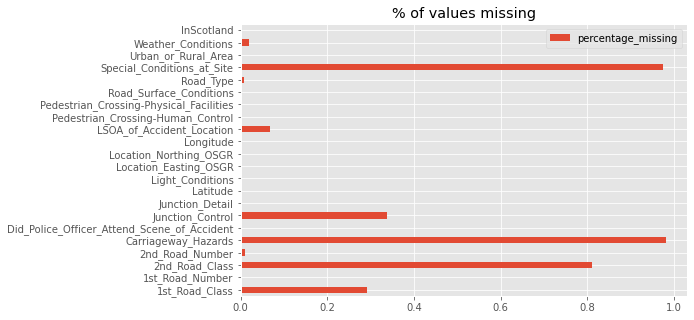

In [ ]:
ncounts.query("percentage_missing>0").plot(kind="barh",figsize=(8,5),title='% of values missing')

In [ ]:
ncounts


,percentage_missing
Accident_Index,0.000000
1st_Road_Class,0.291421
1st_Road_Number,0.000002
2nd_Road_Class,0.811461
2nd_Road_Number,0.010300
Accident_Severity,0.000000
Carriageway_Hazards,0.981204
Day_of_Week,0.000000
Did_Police_Officer_Attend_Scene_of_Accident,0.000256
Junction_Control,0.337459


In [ ]:
cols_to_fill = list(ncounts.query("percentage_missing>0.01").index)  #Number of features where more than 1% of values are missing

In [ ]:
cols_to_fill

['1st_Road_Class',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Junction_Control',
 'LSOA_of_Accident_Location',
 'Special_Conditions_at_Site',
 'Weather_Conditions']

In [ ]:
accident_data[cols_to_fill].dtypes

1st_Road_Class                 object
2nd_Road_Class                 object
2nd_Road_Number               float64
Carriageway_Hazards            object
Junction_Control               object
LSOA_of_Accident_Location      object
Special_Conditions_at_Site     object
Weather_Conditions             object
dtype: object

In [ ]:
#The above are the only features I'll focus on...for the rest of the features, I'll remove the samples where there are missing values
subset = [col for col in accident_data.columns if col not in cols_to_fill]
accident_data = accident_data.dropna(axis=0,subset=subset)

In [ ]:
len(accident_data)   #We only lost 10949 rows out of 1.4mil

1037508

In [ ]:
#Create Tag columns with missing indicators
accident_data_missing_tag_df = accident_data[cols_to_fill].isna()
accident_data_missing_tag_df.columns = [f"{c}_missing" for c in accident_data_missing_tag_df.columns]

In [ ]:
accident_data = pd.concat([accident_data,accident_data_missing_tag_df],axis=1)

In [ ]:
accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,2,Urban,Fine no high winds,2005,No,False,False,False,True,False,False,True,False
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,Thursday,1.0,NaN,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,3,Urban,Fine no high winds,2005,No,False,True,False,True,True,False,True,False
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,Monday,1.0,NaN,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,2,Urban,Fine no high winds,2005,No,True,True,False,True,True,False,True,False
6,200501BS00007,C,0.0,NaN,0.0,Slight,NaN,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524220.0,180830.0,-0.211277,E01002875,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,2,Urban,Fine no high winds,2005,No,False,True,False,True,False,False,True,False
8,200501BS00010,A,3212.0,B,304.0,Slight,NaN,Saturday,1.0,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,527350.0,177650.0,-0.167342,E01002900,2,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,NaN,30,2,Urban,Fine no high winds,2005,No,False,False,False,True,False,False,True,False


In [ ]:
str(accident_data["2nd_Road_Number"].dtype)

'float64'

In [ ]:
X = accident_data.drop(["Accident_Severity"],axis=1)
y = accident_data.Accident_Severity
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
cols_to_fill

['1st_Road_Class',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Junction_Control',
 'LSOA_of_Accident_Location',
 'Special_Conditions_at_Site',
 'Weather_Conditions']

In [ ]:
#Dataset 1: Fill with mean for numerical features and mode for categorical features
num_cols = ["2nd_Road_Number"]
cat_cols = [col for col in cols_to_fill if col!="2nd_Road_Number"]
imptr_num = SimpleImputer(strategy='mean',add_indicator=False)
imptr_cat = SimpleImputer(strategy='most_frequent',add_indicator=False)
X_train_num_imputed = imptr_num.fit_transform(X_train[num_cols])
X_valid_num_imputed = imptr_num.transform(X_valid[num_cols])
X_train_cat_imputed = imptr_cat.fit_transform(X_train[cat_cols])
X_valid_cat_imputed = imptr_cat.transform(X_valid[cat_cols])



In [ ]:
X_train_num_imputed = pd.DataFrame(X_train_num_imputed,columns=num_cols)
X_valid_num_imputed = pd.DataFrame(X_valid_num_imputed,columns=num_cols)
X_train_cat_imputed = pd.DataFrame(X_train_cat_imputed,columns=cat_cols)
X_valid_cat_imputed = pd.DataFrame(X_valid_cat_imputed,columns=cat_cols)

In [ ]:
X_train_imputed = pd.concat([X_train_num_imputed,X_train_cat_imputed],axis=1)
X_valid_imputed = pd.concat([X_valid_num_imputed,X_valid_cat_imputed],axis=1)

X_train_imputed.index = X_train.index
X_valid_imputed.index = X_valid.index

X_train_final = pd.concat([X_train.drop(cols_to_fill,axis=1),X_train_imputed],axis=1)
X_valid_final = pd.concat([X_valid.drop(cols_to_fill,axis=1),X_valid_imputed],axis=1)

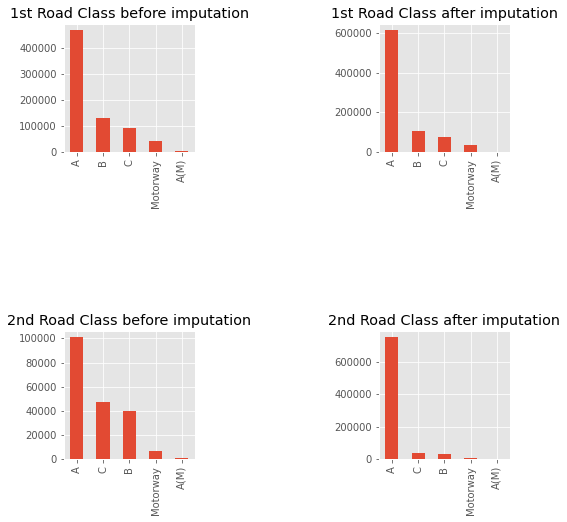

In [ ]:
#Simple Impute
plt.subplot(3,3,1)
accident_data["1st_Road_Class"].value_counts().plot(kind="bar",title="1st Road Class before imputation",figsize=(8,8))
plt.subplot(3,3,3)
X_train_final["1st_Road_Class"].value_counts().plot(kind="bar",title="1st Road Class after imputation",figsize=(8,8))
plt.subplot(3,3,7)
accident_data["2nd_Road_Class"].value_counts().plot(kind="bar",title="2nd Road Class before imputation",figsize=(8,8))
plt.subplot(3,3,9)
X_train_final["2nd_Road_Class"].value_counts().plot(kind="bar",title="2nd Road Class after imputation",figsize=(8,8))




In [ ]:
cols_to_fill

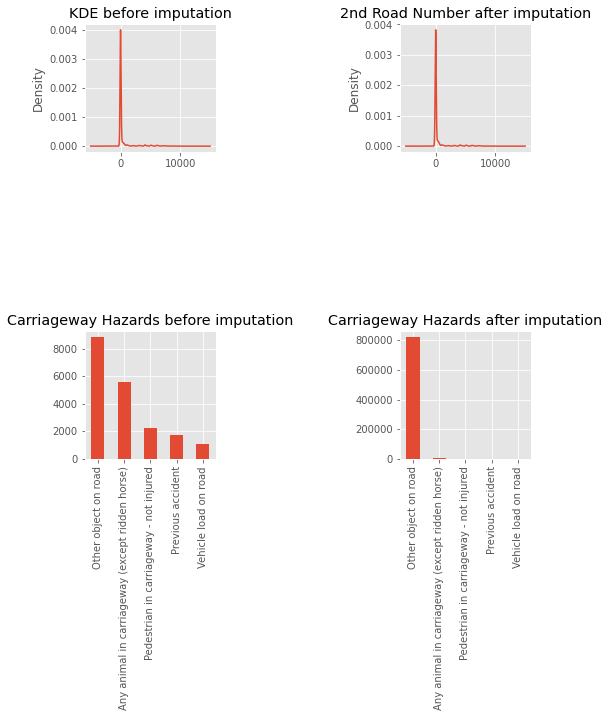

In [81]:
plt.subplot(3,3,1)
accident_data["2nd_Road_Number"].plot(kind="kde",title="KDE before imputation",figsize=(8,8))
plt.subplot(3,3,3)
X_train_final["2nd_Road_Number"].plot(kind="kde",title="2nd Road Number after imputation",figsize=(8,8))
plt.subplot(3,3,7)
accident_data["Carriageway_Hazards"].value_counts().plot(kind="bar",title="Carriageway Hazards before imputation",figsize=(8,8))
plt.subplot(3,3,9)
X_train_final["Carriageway_Hazards"].value_counts().plot(kind="bar",title="Carriageway Hazards after imputation",figsize=(8,8))

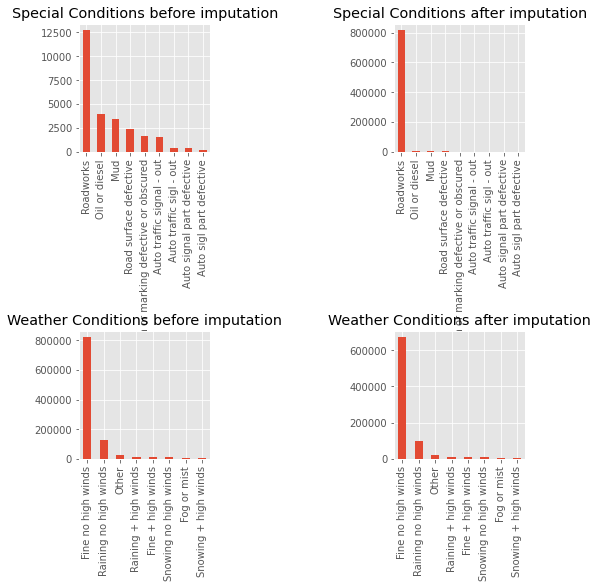

In [ ]:
plt.subplot(3,3,1)
accident_data["Special_Conditions_at_Site"].value_counts().plot(kind="bar",title="Special Conditions before imputation",figsize=(8,8))
plt.subplot(3,3,3)
X_train_final["Special_Conditions_at_Site"].value_counts().plot(kind="bar",title="Special Conditions after imputation",figsize=(8,8))
plt.subplot(3,3,7)
accident_data["Weather_Conditions"].value_counts().plot(kind="bar",title="Weather Conditions before imputation",figsize=(8,8))
plt.subplot(3,3,9)
X_train_final["Weather_Conditions"].value_counts().plot(kind="bar",title="Weather Conditions after imputation",figsize=(8,8))


In [82]:
X_train_final["Weather_Conditions"].value_counts()

Fine no high winds       674636
Raining no high winds     99338
Other                     21072
Raining + high winds      11665
Fine + high winds         10748
Snowing no high winds      6743
Fog or mist                4794
Snowing + high winds       1010
Name: Weather_Conditions, dtype: int64

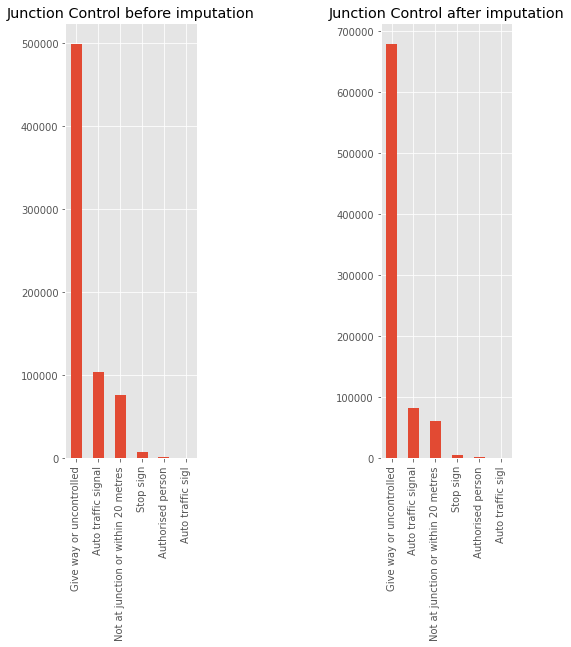

In [ ]:
plt.subplot(1,3,1)
accident_data["Junction_Control"].value_counts().plot(kind="bar",title="Junction Control before imputation",figsize=(8,8))
plt.subplot(1,3,3)
X_train_final["Junction_Control"].value_counts().plot(kind="bar",title="Junction Control after imputation",figsize=(8,8))


In [ ]:
X_train_final.to_csv("features_train_simple_impute.csv")
X_valid_final.to_csv("features_valid_simple_impute.csv")
y_train.to_csv("target_train_simple_impute.csv")
y_valid.to_csv("target_valid_simple_impute.csv")